In [305]:
# 载入Boston房价的数据
from sklearn.datasets import load_boston

In [306]:
boston=load_boston()

In [307]:
print(boston.data.ndim)
print(boston.target.ndim)

2
1


In [308]:
x=boston.data
y=boston.target


In [309]:
# 划分数据集
from sklearn.model_selection import train_test_split


In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [311]:
x_train.shape

(354, 13)

In [312]:
x_test.shape
y_test.ndim

1

In [313]:
# 对数据进行特征工程处理，也就是进行标准化处理。在用到正则的模型时，都得进行标准化处理。因为用到正则的模型，参数值的大小程度或者说大小的级别是与特征的数值范围相关的。权重参数有很大的影响。
from sklearn import preprocessing
std = preprocessing.StandardScaler()

In [314]:
x_train_sd=std.fit_transform(x_train)
x_test_sd=std.transform(x_test)
y_train_sd=std.fit_transform(y_train.reshape(-1,1))
y_test_sd=std.transform(y_test.reshape(-1,1))

In [315]:
y_test_sd.ndim

2

In [316]:
y_train_sd

array([[ 2.68199572e-01],
       [ 6.84762834e-01],
       [-4.70374916e-02],
       [-2.00362540e-03],
       [-2.49689889e-01],
       [ 5.49661235e-01],
       [ 1.38278776e+00],
       [ 7.68056404e-02],
       [ 4.30302408e-02],
       [-2.94723755e-01],
       [ 1.44356440e-01],
       [ 1.36027083e+00],
       [-3.51016088e-01],
       [ 5.04627369e-01],
       [-5.53668486e-01],
       [ 3.17717742e-02],
       [ 3.08281621e+00],
       [ 1.56292322e+00],
       [ 2.68199572e-01],
       [-9.36456348e-01],
       [ 1.64173249e+00],
       [ 9.66224497e-01],
       [ 2.63247755e+00],
       [ 4.25818103e-01],
       [ 5.49661235e-01],
       [-1.03778255e+00],
       [-9.92748681e-01],
       [-3.73533021e-01],
       [ 1.38278776e+00],
       [-5.42410019e-01],
       [-2.83465289e-01],
       [-1.06029948e+00],
       [-3.05982222e-01],
       [-1.20665955e+00],
       [-3.62274555e-01],
       [-2.45205585e-02],
       [-9.13939415e-01],
       [ 2.45682639e-01],
       [ 6.0

In [317]:
y_train_sd.ravel()# ravel() numpy 的方法，将多维array转化为1维

array([ 2.68199572e-01,  6.84762834e-01, -4.70374916e-02, -2.00362540e-03,
       -2.49689889e-01,  5.49661235e-01,  1.38278776e+00,  7.68056404e-02,
        4.30302408e-02, -2.94723755e-01,  1.44356440e-01,  1.36027083e+00,
       -3.51016088e-01,  5.04627369e-01, -5.53668486e-01,  3.17717742e-02,
        3.08281621e+00,  1.56292322e+00,  2.68199572e-01, -9.36456348e-01,
        1.64173249e+00,  9.66224497e-01,  2.63247755e+00,  4.25818103e-01,
        5.49661235e-01, -1.03778255e+00, -9.92748681e-01, -3.73533021e-01,
        1.38278776e+00, -5.42410019e-01, -2.83465289e-01, -1.06029948e+00,
       -3.05982222e-01, -1.20665955e+00, -3.62274555e-01, -2.45205585e-02,
       -9.13939415e-01,  2.45682639e-01,  6.05953568e-01, -1.39805348e+00,
       -7.33803951e-01,  1.44356440e-01,  1.66873373e-01, -4.63600754e-01,
       -2.49689889e-01,  1.13510150e+00, -1.60070587e+00, -8.35130150e-01,
       -3.51016088e-01,  1.68676636e+00, -3.96049954e-01, -4.97376153e-01,
       -2.38431423e-01, -

In [318]:
from sklearn.linear_model import ElasticNet
EN=ElasticNet(alpha=0.1,l1_ratio=0.71)
EN.fit(x_train_sd,y_train_sd.ravel())

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.71,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [319]:
EN.score(x_test_sd,y_test_sd)

0.7103309442198009

In [320]:
# 可视化
import matplotlib.pyplot as plt

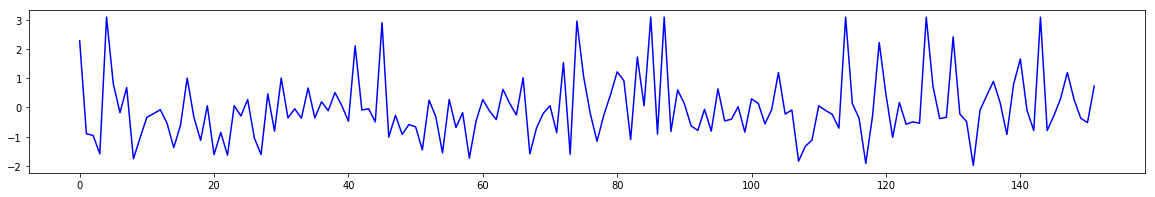

In [321]:
fig,axes = plt.subplots(figsize=(20,3))
line1=axes.plot(range(len(y_test_sd)),y_test_sd,color='b',label='actual Value')

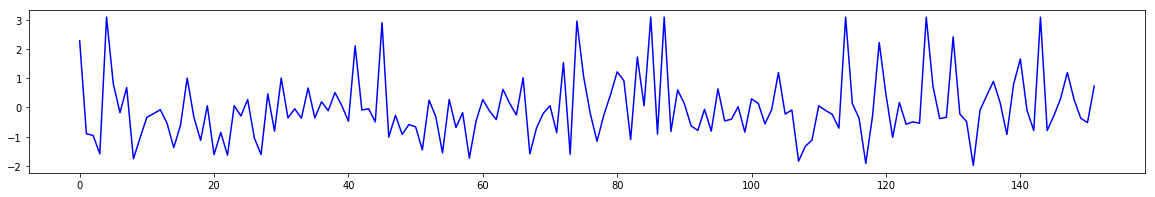

In [322]:
fig

In [323]:
y_predict=EN.predict(x_test_sd)
line2=axes.plot(range(len(y_predict)),y_predict,color='g',label='predict Value',linewidth=2)

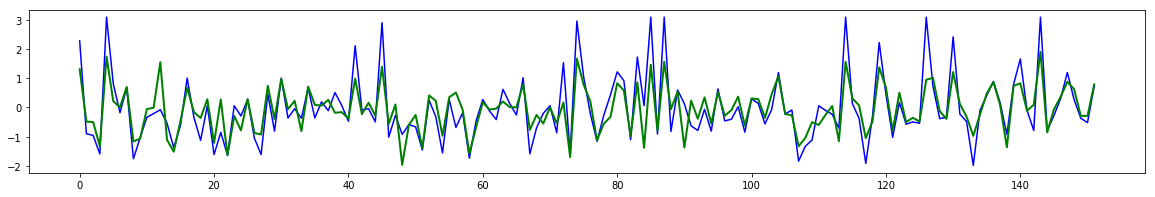

In [324]:
fig

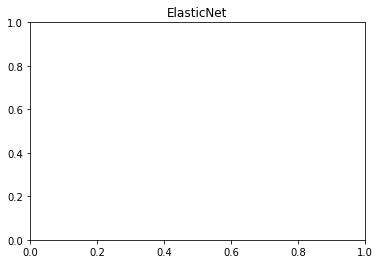

In [325]:
axes.grid()
axes.legend()
plt.title("ElasticNet")
plt.show()

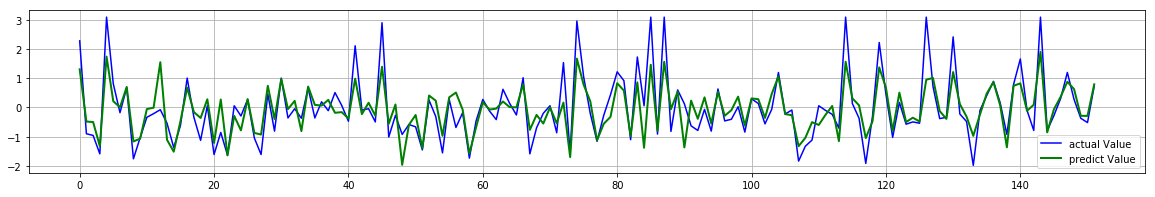

In [326]:
fig